In [11]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [12]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [13]:
domain  = [[0, 1], [0, 1]]

x0 = [[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]]
a0 = [2.0, -1.0, 1.5]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([[0.1, 0.2, 0.7], [0.5, 0.4, 0.8]], [2.0, -1.0, 1.5], 2, 3)

In [14]:
# Define the number of Fourier coefficients
fc = 6
n = 2fc + 1

# Define noise level
noise_level = 0.1

# Seed for noise
# Random.seed!(22)

0.1

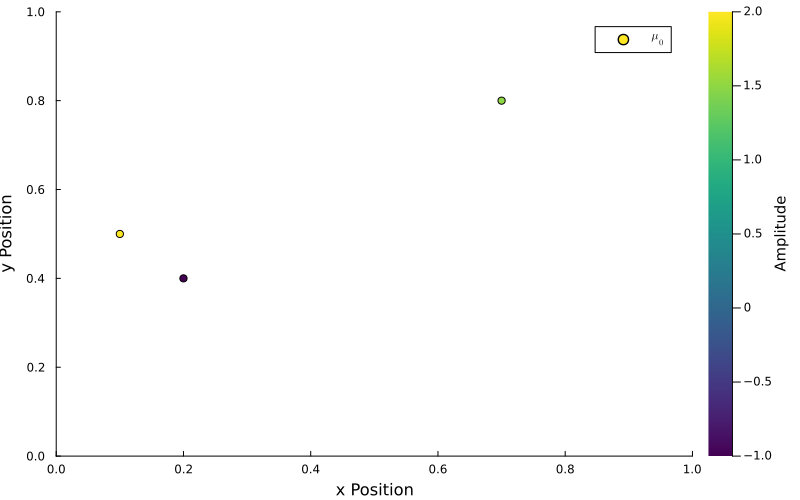

In [15]:
# Define the plot
num_points = 100

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

plt_gt = deepcopy(plt)
plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis)

169-element Vector{ComplexF64}:
  0.060931636273430234 - 0.05398690445218469im
  -0.12978947907649008 + 0.03697036339252438im
     -0.25095353308537 - 0.03694599584415941im
 -0.021361415545014646 + 0.0888956949133925im
   0.07718464926471487 + 0.3153671517934912im
   0.09169031752972244 + 0.16686370887200797im
   0.22933619634245234 - 0.15692597155218785im
    0.1965954670763237 - 0.10617280378643904im
    -0.127572271502949 - 0.07046205819493881im
  -0.10367439353360755 - 0.1884506523538493im
                       ⋮
    -0.127572271502949 + 0.07046205819493881im
    0.1965954670763237 + 0.10617280378643904im
   0.22933619634245234 + 0.15692597155218785im
   0.09169031752972244 - 0.16686370887200797im
   0.07718464926471487 - 0.3153671517934912im
 -0.021361415545014643 - 0.0888956949133925im
     -0.25095353308537 + 0.03694599584415941im
  -0.12978947907649008 - 0.036970363392524394im
  0.060931636273430234 + 0.05398690445218469im

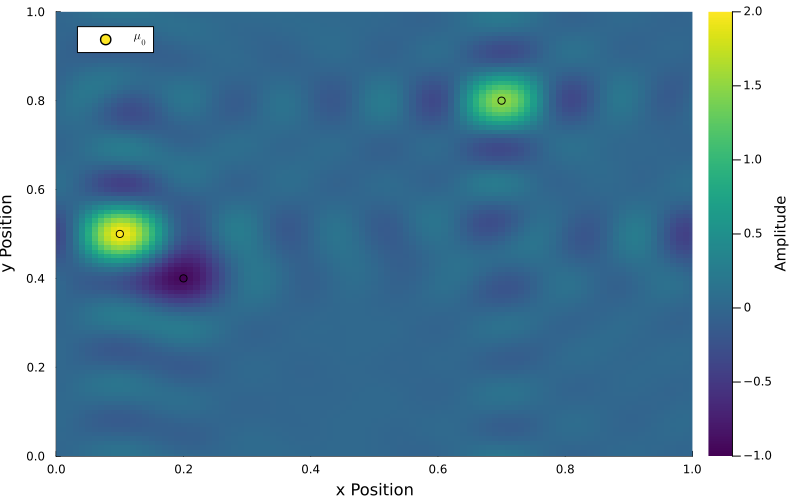

In [16]:
ops = fourier_operators_2D(fc, plt_grid_x1, plt_grid_x2)

y0 = ops.Φ(x0..., a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = fftshift(fft(randn(length(y0))))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

display(y)

heatmap!(plt_obs, grid, grid, ops.adjΦ(y), color=:viridis)
plot_spikes!(plt_obs, μ0, label=L"μ_0")

## Pre-certificate

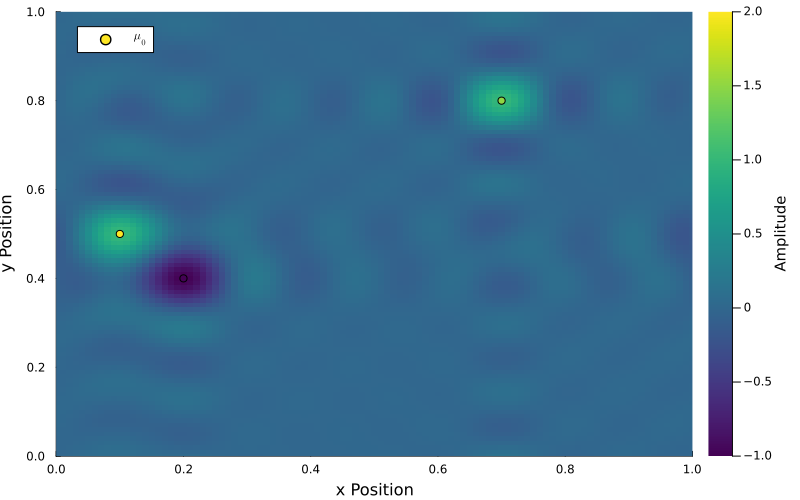

In [17]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0")

### SFW

In [18]:
# Define λ the regularisation parameter
λ = noise_level

prob = BLASSO(y, ops, domain, λ)

BLASSO(ComplexF64[0.060931636273430234 - 0.05398690445218469im, -0.12978947907649008 + 0.03697036339252438im, -0.25095353308537 - 0.03694599584415941im, -0.021361415545014646 + 0.0888956949133925im, 0.07718464926471487 + 0.3153671517934912im, 0.09169031752972244 + 0.16686370887200797im, 0.22933619634245234 - 0.15692597155218785im, 0.1965954670763237 - 0.10617280378643904im, -0.127572271502949 - 0.07046205819493881im, -0.10367439353360755 - 0.1884506523538493im  …  -0.10367439353360755 + 0.1884506523538493im, -0.127572271502949 + 0.07046205819493881im, 0.1965954670763237 + 0.10617280378643904im, 0.22933619634245234 + 0.15692597155218785im, 0.09169031752972244 - 0.16686370887200797im, 0.07718464926471487 - 0.3153671517934912im, -0.021361415545014643 - 0.0888956949133925im, -0.25095353308537 + 0.03694599584415941im, -0.12978947907649008 - 0.036970363392524394im, 0.060931636273430234 + 0.05398690445218469im], Operators(var"#ϕ#17"{Int64, Float64, UnitRange{Int64}, UnitRange{Int64}}(169, 0.0

In [19]:
prob_sfw = deepcopy(prob)

solve!(prob_sfw, :SFW, options=Dict(:maxits => 100))

BLASSO(ComplexF64[0.060931636273430234 - 0.05398690445218469im, -0.12978947907649008 + 0.03697036339252438im, -0.25095353308537 - 0.03694599584415941im, -0.021361415545014646 + 0.0888956949133925im, 0.07718464926471487 + 0.3153671517934912im, 0.09169031752972244 + 0.16686370887200797im, 0.22933619634245234 - 0.15692597155218785im, 0.1965954670763237 - 0.10617280378643904im, -0.127572271502949 - 0.07046205819493881im, -0.10367439353360755 - 0.1884506523538493im  …  -0.10367439353360755 + 0.1884506523538493im, -0.127572271502949 + 0.07046205819493881im, 0.1965954670763237 + 0.10617280378643904im, 0.22933619634245234 + 0.15692597155218785im, 0.09169031752972244 - 0.16686370887200797im, 0.07718464926471487 - 0.3153671517934912im, -0.021361415545014643 - 0.0888956949133925im, -0.25095353308537 + 0.03694599584415941im, -0.12978947907649008 - 0.036970363392524394im, 0.060931636273430234 + 0.05398690445218469im], Operators(var"#ϕ#17"{Int64, Float64, UnitRange{Int64}, UnitRange{Int64}}(169, 0.0

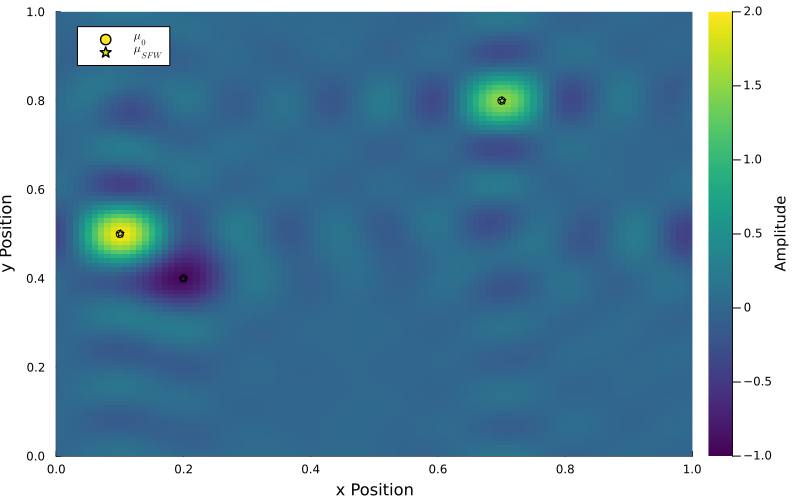

In [20]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob_sfw.μ, label=L"μ_{SFW}", colorscheme=:viridis, marker=:star)